In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread('data/reddot_face.png')

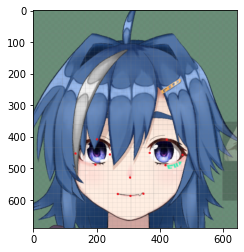

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # OpenCV は色がGBR順なのでRGB順に並べ替える
plt.show()

In [12]:
def find_red_dot(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV_FULL)
    #print(hsv.shape)
    h = hsv[:, :, 0]
    #print(h.shape)
    s = hsv[:, :, 1]
    mask = np.zeros(h.shape, dtype=np.uint8)
    mask[((h < 5) | (h > 250)) & (s > 200)] = 255
    plt.imshow(mask)
    plt.show
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    points = np.zeros((len(contours), 2))
    for i in range(len(contours)):
        center = [0, 0]
        for j in range(len(contours[i])):
            center += contours[i][j]
        center = center / len(contours[i])
        points[i] = center
    return points

[[308.125 587.125]
 [268.125 581.125]
 [349.125 580.125]
 [307.125 529.125]
 [419.125 490.125]
 [197.125 488.125]
 [473.25  457.   ]
 [243.125 456.125]
 [134.125 453.125]
 [369.125 451.125]
 [423.125 409.125]
 [202.125 408.125]]
12


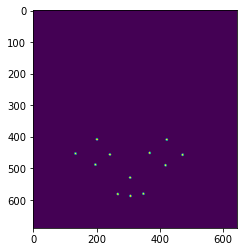

In [13]:
c = find_red_dot(img)
print(c)
print(len(c))